# Import librairies et données

## Librairies

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels
import statannotations
from matplotlib.patches import Patch
from statannotations.Annotator import Annotator
import pingouin as pg
import os

## Données

In [190]:
os.chdir("../results/csv")

In [191]:
data = pd.read_csv("data.csv")

In [3]:
data_degrees = pd.read_csv("data_degrees.csv")

In [4]:
data_el = pd.read_csv("data_el.csv")

In [115]:
data_er = pd.read_csv("data_er.csv")

In [168]:
data_bc = pd.read_csv("data_bc.csv")

In [173]:
angles = pd.read_csv("data_angles.csv")

## Thème

In [194]:
os.chdir("../plots/plots_final")

In [7]:
sns.set_theme(style="whitegrid", context="paper", palette="pastel")

### Palettes de couleurs

In [29]:
pastel_blue = sns.color_palette("pastel")[0]  # Pour Gigaspora
pastel_orange = sns.color_palette("pastel")[1]  # Pour Rhizophagus

muted_blue = sns.color_palette("muted")[0]
muted_orange = sns.color_palette("muted")[1]

# Palettes custom
palette_pastel = {"gigaspora": pastel_blue, "rhizophagus": pastel_orange}
palette_muted = {"gigaspora": muted_blue, "rhizophagus": muted_orange}

### Légende custom

In [43]:
box_lines = [child for child in ax.get_children() if isinstance(child, plt.Line2D)]
box_outline_color = box_lines[0].get_color()

In [45]:
custom_legend = [Patch(facecolor=pastel_blue, edgecolor=box_outline_color, label=r"$\it{Gigaspora}$ sp."),
                 Patch(facecolor=pastel_orange, edgecolor=box_outline_color, label=r"$\it{R.\ irregularis}$")]

# Mesures de base

In [8]:
data

,sp,boite,mesure,photo,nodes,edges,cycle density,total hyphal length,spatial density,vitesse de croissance
0,gigaspora,34,1,G09_10_06_P01.pklclean,188,199,0.063830,106.280808,0.802978,106.280808
1,gigaspora,34,1,G09_10_06_P02.pklclean,24,27,0.166667,20.240043,0.901219,20.240043
2,gigaspora,34,1,G09_10_06_P03.pklclean,271,295,0.092251,122.427177,1.006685,122.427177
3,gigaspora,34,2,G09_16_06_P01.pklclean,27,36,0.370370,9.790577,24.518979,4.895289
4,gigaspora,34,2,G09_16_06_P02.pklclean,47,53,0.148936,56.334241,0.869293,28.167121
...,...,...,...,...,...,...,...,...,...,...
606,rhizophagus,25,4,R25_14_07_P19.pklclean,2052,2420,0.179825,514.113414,0.943986,128.528353
607,rhizophagus,25,4,R25_14_07_P20.pklclean,1691,1962,0.160852,492.714003,1.242359,123.178501
608,rhizophagus,25,4,R25_14_07_P21.pklclean,423,496,0.174941,117.030650,1.089573,29.257663
609,rhizophagus,25,4,R25_14_07_P22.pklclean,383,458,0.198433,82.384023,1.452783,20.596006


## Nombre de noeuds

### Semaine 3

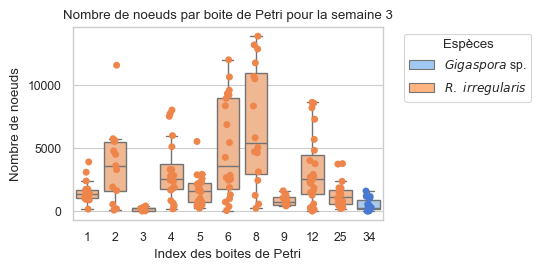

In [46]:
fig, ax = plt.subplots(figsize=(4, 2.5))

ax = sns.boxplot(x="boite", y="nodes", data=data[data["mesure"] == 3], 
            palette=palette_pastel, hue="sp", showfliers=False)

sns.stripplot(x="boite", y="nodes", hue="sp", data=data[data["mesure"] == 3], 
              palette=palette_muted, dodge=False, legend=False)

ax.legend(title='Espèces', handles=custom_legend, 
          bbox_to_anchor=(1.05, 1), loc="upper left")

ax.set_title("Nombre de noeuds par boite de Petri pour la semaine 3")
ax.set_ylabel("Nombre de noeuds")
ax.set_xlabel("Index des boites de Petri")
ax.set_yticks([0, 5000, 10000])

fig.savefig("nodes_w3", dpi=250, bbox_inches="tight", pad_inches=0.1)

### Par espèces

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:2.916e-04 U_stat=1.100e+01
1_gigaspora vs. 1_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:3.309e-01 U_stat=3.100e+01
3_gigaspora vs. 3_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:2.585e-05 U_stat=3.885e+02
4_gigaspora vs. 4_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:6.168e-04 U_stat=6.505e+02


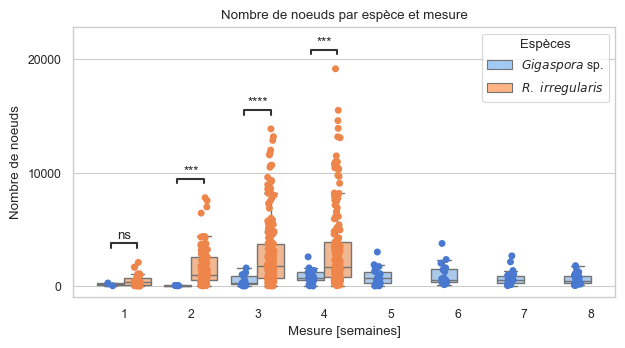

In [59]:
fig, ax = plt.subplots(figsize=(7, 3.5))

ax = sns.boxplot(x="mesure", y="nodes", data=data, 
            palette=palette_pastel, hue="sp", showfliers=False)

sns.stripplot(x="mesure", y="nodes", hue="sp", data=data, 
              palette=palette_muted, dodge=True, legend=False)

ax.legend(title='Espèces', handles=custom_legend, 
          loc="upper right")
          # bbox_to_anchor=(1.05, 1), loc="upper left")

ax.set_title("Nombre de noeuds par espèce et mesure")
ax.set_ylabel("Nombre de noeuds")
ax.set_xlabel("Mesure [semaines]")
ax.set_yticks([0, 10000, 20000])

unique_mesures = [1, 2, 3, 4]
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures]

annotator = Annotator(ax, pairs, data=data, x="mesure", y="nodes", hue="sp")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

fig.savefig("nodes", dpi=250, bbox_inches="tight", pad_inches=0.1)

## Nombre de edges

### Par espèces

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:3.070e-04 U_stat=1.200e+01
1_gigaspora vs. 1_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:2.756e-01 U_stat=2.900e+01
3_gigaspora vs. 3_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:2.526e-05 U_stat=3.875e+02
4_gigaspora vs. 4_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:6.336e-04 U_stat=6.520e+02


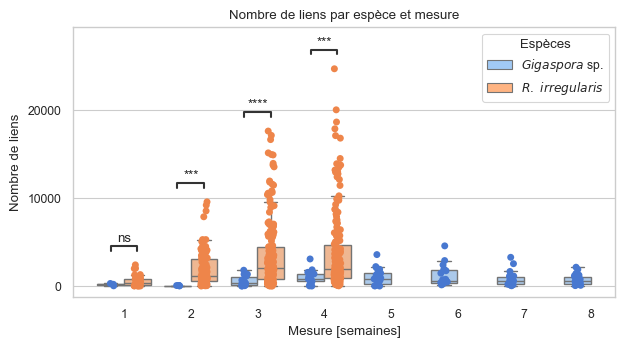

In [58]:
fig, ax = plt.subplots(figsize=(7, 3.5))

ax = sns.boxplot(x="mesure", y="edges", data=data, 
            palette=palette_pastel, hue="sp", showfliers=False)

sns.stripplot(x="mesure", y="edges", hue="sp", data=data, 
              palette=palette_muted, dodge=True, legend=False)

ax.legend(title='Espèces', handles=custom_legend, 
          loc="upper right")
          # bbox_to_anchor=(1.05, 1), loc="upper left")

ax.set_title("Nombre de liens par espèce et mesure")
ax.set_ylabel("Nombre de liens")
ax.set_xlabel("Mesure [semaines]")
ax.set_yticks([0, 10000, 20000])

unique_mesures = [1, 2, 3, 4]
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures]

annotator = Annotator(ax, pairs, data=data, x="mesure", y="edges", hue="sp")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

fig.savefig("edges", dpi=250, bbox_inches="tight", pad_inches=0.1)

## Rapport edges/nodes

In [83]:
data["edges/nodes"] = data["edges"] / data["nodes"]

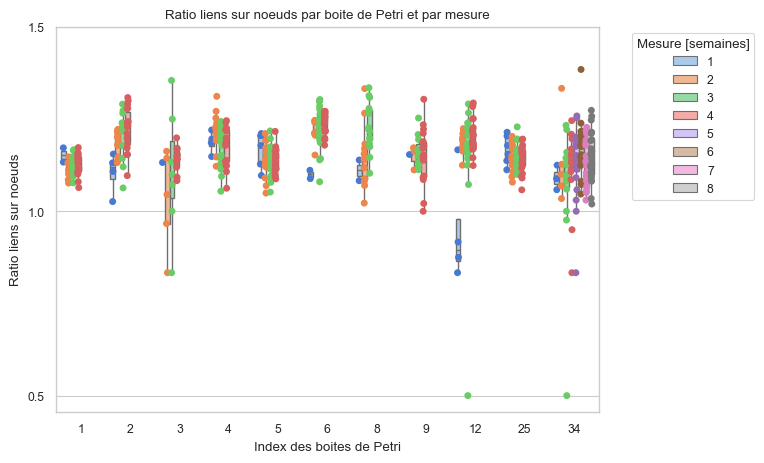

In [93]:
fig, ax = plt.subplots(figsize=(7, 5))

ax = sns.boxplot(x="boite", y="edges/nodes", data=data, 
            palette="pastel", hue="mesure", showfliers=False)

sns.stripplot(x="boite", y="edges/nodes", hue="mesure", data=data, 
              palette="muted", dodge=True, legend=False)

ax.legend(title='Mesure [semaines]',
          bbox_to_anchor=(1.05, 1), loc="upper left")

ax.set_title("Ratio liens sur noeuds par boite de Petri et par mesure")
ax.set_ylabel("Ratio liens sur noeuds")
ax.set_xlabel("Index des boites de Petri")
ax.set_yticks([0.5, 1, 1.5])

fig.savefig("edges_nodes", dpi=250, bbox_inches="tight", pad_inches=0.1)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:1.093e-01 U_stat=1.630e+02
1_gigaspora vs. 1_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:9.306e-02 U_stat=1.900e+01
3_gigaspora vs. 3_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:8.940e-04 U_stat=5.600e+02
4_gigaspora vs. 4_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:2.449e-02 U_stat=8.910e+02


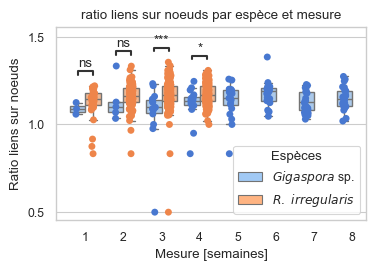

In [96]:
fig, ax = plt.subplots(figsize=(4, 2.5))

ax = sns.boxplot(x="mesure", y="edges/nodes", data=data, 
            palette=palette_pastel, hue="sp", showfliers=False)

sns.stripplot(x="mesure", y="edges/nodes", hue="sp", data=data, 
              palette=palette_muted, dodge=True, legend=False)

ax.legend(title='Espèces', handles=custom_legend, 
          loc="lower right")
          # bbox_to_anchor=(1.05, 1), loc="upper left")

ax.set_title("ratio liens sur noeuds par espèce et mesure")
ax.set_ylabel("Ratio liens sur noeuds")
ax.set_xlabel("Mesure [semaines]")
ax.set_yticks([0.5, 1, 1.5])

unique_mesures = [1, 2, 3, 4]
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures]

annotator = Annotator(ax, pairs, data=data, x="mesure", y="edges/nodes", hue="sp")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

fig.savefig("ratio_sp", dpi=250, bbox_inches="tight", pad_inches=0.1)

## Distibution des degrés

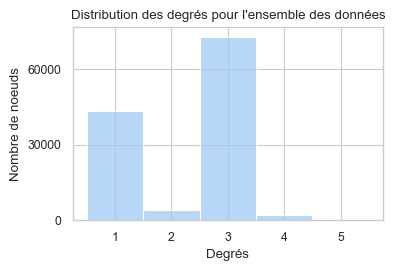

In [55]:
fig, ax = plt.subplots(figsize=(4, 2.5))

ax = sns.histplot(data=data_degrees, x="degrees", bins=2, discrete=True)

ax.set_title("Distribution des degrés pour l'ensemble des données")
ax.set_xlabel("Degrés")
ax.set_ylabel("Nombre de noeuds")
ax.set_yticks([0, 30000, 60000])

fig.savefig("degrees", dpi=250, bbox_inches="tight", pad_inches=0.1)

### Par espèce

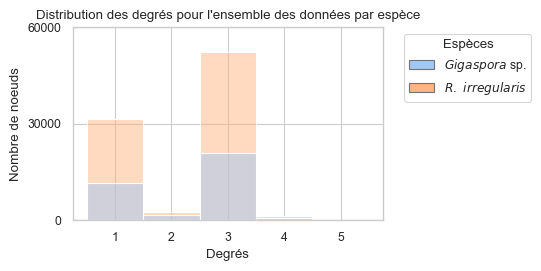

In [57]:
fig, ax = plt.subplots(figsize=(4, 2.5))

ax = sns.histplot(data=data_degrees, x="degrees", bins=2, 
                  hue="sp", palette=palette_pastel, discrete=True, legend=False)

ax.legend(title="Espèces", handles=custom_legend, 
          bbox_to_anchor=(1.05, 1), loc="upper left")

ax.set_title("Distribution des degrés pour l'ensemble des données par espèce")
ax.set_xlabel("Degrés")
ax.set_ylabel("Nombre de noeuds")
ax.set_yticks([0, 30000, 60000])

fig.savefig("degrees_sp", dpi=250, bbox_inches="tight", pad_inches=0.1)

## Cycle density

### Par espèces

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:4.463e-01 U_stat=2.270e+02
1_gigaspora vs. 1_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:2.627e-01 U_stat=2.850e+01
3_gigaspora vs. 3_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:1.017e-03 U_stat=5.670e+02
4_gigaspora vs. 4_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:2.641e-02 U_stat=8.970e+02


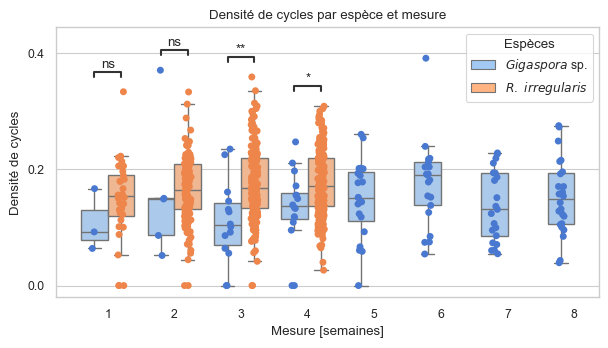

In [61]:
fig, ax = plt.subplots(figsize=(7, 3.5))

ax = sns.boxplot(x="mesure", y="cycle density", data=data, 
            palette=palette_pastel, hue="sp", showfliers=False)

sns.stripplot(x="mesure", y="cycle density", hue="sp", data=data, 
              palette=palette_muted, dodge=True, legend=False)

ax.legend(title='Espèces', handles=custom_legend, 
          loc="upper right")
          # bbox_to_anchor=(1.05, 1), loc="upper left")

ax.set_title("Densité de cycles par espèce et mesure")
ax.set_ylabel("Densité de cycles")
ax.set_xlabel("Mesure [semaines]")
ax.set_yticks([0, 0.2, 0.4])

unique_mesures = [1, 2, 3, 4]
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures]

annotator = Annotator(ax, pairs, data=data, x="mesure", y="cycle density", hue="sp")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

fig.savefig("cycle_density", dpi=250, bbox_inches="tight", pad_inches=0.1)

## Total hyphal length

### Par espèces

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:4.126e-04 U_stat=4.800e+01
1_gigaspora vs. 1_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:5.950e-01 U_stat=3.800e+01
3_gigaspora vs. 3_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:5.173e-04 U_stat=5.310e+02
4_gigaspora vs. 4_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:1.437e-03 U_stat=6.990e+02


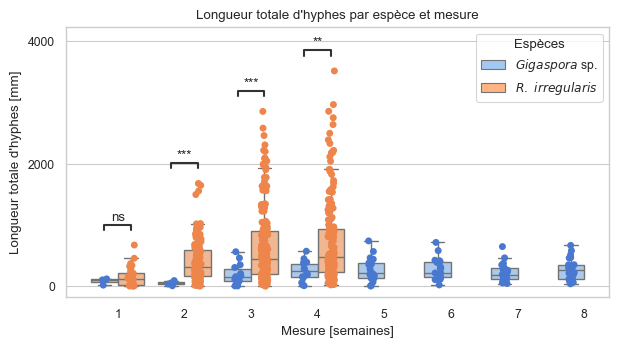

In [65]:
fig, ax = plt.subplots(figsize=(7, 3.5))

ax = sns.boxplot(x="mesure", y="total hyphal length", data=data, 
            palette=palette_pastel, hue="sp", showfliers=False)

sns.stripplot(x="mesure", y="total hyphal length", hue="sp", data=data, 
              palette=palette_muted, dodge=True, legend=False)

ax.legend(title='Espèces', handles=custom_legend, 
          loc="upper right")
          # bbox_to_anchor=(1.05, 1), loc="upper left")

ax.set_title("Longueur totale d'hyphes par espèce et mesure")
ax.set_ylabel("Longueur totale d'hyphes [mm]")
ax.set_xlabel("Mesure [semaines]")
ax.set_yticks([0, 2000, 4000])

unique_mesures = [1, 2, 3, 4]
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures]

annotator = Annotator(ax, pairs, data=data, x="mesure", y="total hyphal length", hue="sp")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

fig.savefig("thl", dpi=250, bbox_inches="tight", pad_inches=0.1)

### Evolution

In [77]:
thl_mean = data.groupby(
    ['boite', 'mesure']
)['total hyphal length'].mean().reset_index(name='total hyphal length')

thl_mean['sp'] = data.groupby(['boite', 'mesure'])['sp'].first().values

thl_mean = pd.DataFrame(thl_mean)

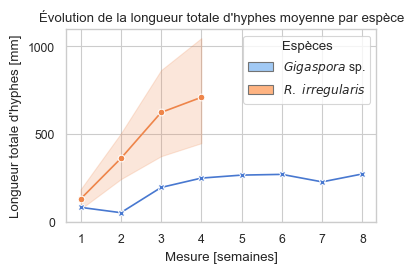

In [82]:
fig, ax = plt.subplots(figsize=(4, 2.5))

ax = sns.lineplot(x="mesure", y="total hyphal length", data=thl_mean, 
                  palette=palette_muted, hue="sp", markers=True, style="sp", dashes=False)

ax.legend(title='Espèces', handles=custom_legend, 
          loc="upper right")
          # bbox_to_anchor=(1.05, 1), loc="upper left")

ax.set_title("Évolution de la longueur totale d'hyphes moyenne par espèce")
ax.set_ylabel("Longueur totale d'hyphes [mm]")
ax.set_xlabel("Mesure [semaines]")
ax.set_yticks([0, 500, 1000])


fig.savefig("thl_mean", dpi=250, bbox_inches="tight", pad_inches=0.1)

### Evolution par boites

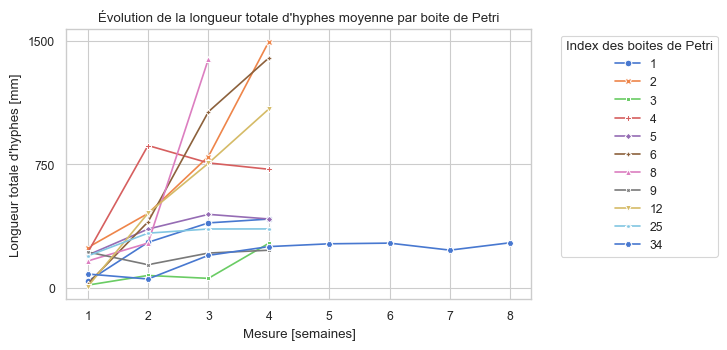

In [105]:
fig, ax = plt.subplots(figsize=(6, 3.5))

ax = sns.lineplot(x="mesure", y="total hyphal length", data=thl_mean, 
                  palette="muted", hue="boite", markers=True, style="boite", dashes=False)

ax.legend(title='Index des boites de Petri', 
          bbox_to_anchor=(1.05, 1), loc="upper left")

ax.set_title("Évolution de la longueur totale d'hyphes moyenne par boite de Petri")
ax.set_ylabel("Longueur totale d'hyphes [mm]")
ax.set_xlabel("Mesure [semaines]")
ax.set_yticks([0, 750, 1500])

fig.savefig("thl_mean_boites", dpi=250, bbox_inches="tight", pad_inches=0.1)

## Spatial density

### Par espèces

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:3.795e-02 U_stat=1.300e+02
1_gigaspora vs. 1_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:1.241e-01 U_stat=2.100e+01
3_gigaspora vs. 3_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:5.953e-02 U_stat=8.385e+02
4_gigaspora vs. 4_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:1.917e-02 U_stat=8.720e+02


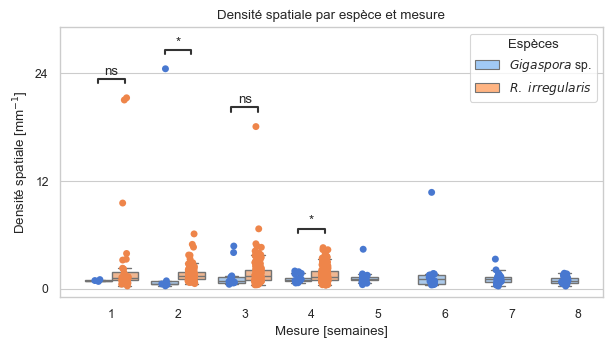

In [73]:
fig, ax = plt.subplots(figsize=(7, 3.5))

ax = sns.boxplot(x="mesure", y="spatial density", data=data, 
            palette=palette_pastel, hue="sp", showfliers=False)

sns.stripplot(x="mesure", y="spatial density", hue="sp", data=data, 
              palette=palette_muted, dodge=True, legend=False)

ax.legend(title='Espèces', handles=custom_legend, 
          loc="upper right")
          # bbox_to_anchor=(1.05, 1), loc="upper left")

ax.set_title("Densité spatiale par espèce et mesure")
ax.set_ylabel("Densité spatiale [mm$^{-1}$]")
ax.set_xlabel("Mesure [semaines]")
ax.set_yticks([0, 12, 24])

unique_mesures = [1, 2, 3, 4]
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures]

annotator = Annotator(ax, pairs, data=data, x="mesure", y="spatial density", hue="sp")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

fig.savefig("spatial_density", dpi=250, bbox_inches="tight", pad_inches=0.1)

## Vitesse de croissance

### Par espèces

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:4.126e-04 U_stat=4.800e+01
1_gigaspora vs. 1_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:5.950e-01 U_stat=3.800e+01
3_gigaspora vs. 3_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:5.173e-04 U_stat=5.310e+02
4_gigaspora vs. 4_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:1.437e-03 U_stat=6.990e+02


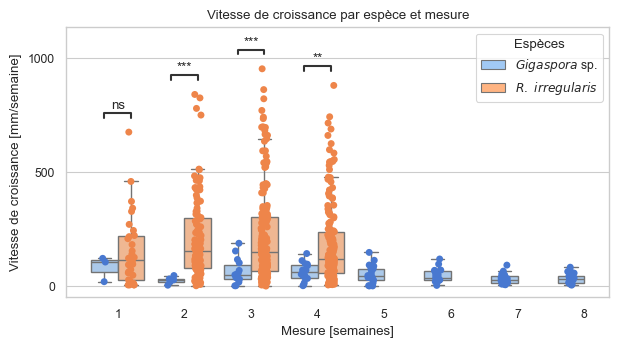

In [76]:
fig, ax = plt.subplots(figsize=(7, 3.5))

ax = sns.boxplot(x="mesure", y="vitesse de croissance", data=data, 
            palette=palette_pastel, hue="sp", showfliers=False)

sns.stripplot(x="mesure", y="vitesse de croissance", hue="sp", data=data, 
              palette=palette_muted, dodge=True, legend=False)

ax.legend(title='Espèces', handles=custom_legend, 
          loc="upper right")
          # bbox_to_anchor=(1.05, 1), loc="upper left")

ax.set_title("Vitesse de croissance par espèce et mesure")
ax.set_ylabel("Vitesse de croissance [mm/semaine]")
ax.set_xlabel("Mesure [semaines]")
ax.set_yticks([0, 500, 1000])

unique_mesures = [1, 2, 3, 4]
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures]

annotator = Annotator(ax, pairs, data=data, x="mesure", y="vitesse de croissance", hue="sp")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

fig.savefig("vitesse_croissance", dpi=250, bbox_inches="tight", pad_inches=0.1)

# Longueur des liens

In [118]:
data_el

,sp,boite,mesure,photo,edge length
0,gigaspora,34,1,G09_10_06_P01.pklclean,0.2991
1,gigaspora,34,1,G09_10_06_P01.pklclean,1.8697
2,gigaspora,34,1,G09_10_06_P01.pklclean,0.4838
3,gigaspora,34,1,G09_10_06_P01.pklclean,0.1584
4,gigaspora,34,1,G09_10_06_P01.pklclean,7.3274
...,...,...,...,...,...
1617767,rhizophagus,25,4,R25_14_07_P23.pklclean,0.1194
1617768,rhizophagus,25,4,R25_14_07_P23.pklclean,0.0980
1617769,rhizophagus,25,4,R25_14_07_P23.pklclean,0.0449
1617770,rhizophagus,25,4,R25_14_07_P23.pklclean,0.0945


In [164]:
data = data_el[data_el["photo"] == "G09_29_07_P15.pklclean"]

In [165]:
data

,sp,boite,mesure,photo,edge length
95679,gigaspora,34,8,G09_29_07_P15.pklclean,3.6948
95680,gigaspora,34,8,G09_29_07_P15.pklclean,1.3062
95681,gigaspora,34,8,G09_29_07_P15.pklclean,11.9516
95682,gigaspora,34,8,G09_29_07_P15.pklclean,2.2882
95683,gigaspora,34,8,G09_29_07_P15.pklclean,2.9032
...,...,...,...,...,...
95757,gigaspora,34,8,G09_29_07_P15.pklclean,0.1541
95758,gigaspora,34,8,G09_29_07_P15.pklclean,0.1049
95759,gigaspora,34,8,G09_29_07_P15.pklclean,0.6679
95760,gigaspora,34,8,G09_29_07_P15.pklclean,0.0814


<Axes: xlabel='edge length', ylabel='Count'>

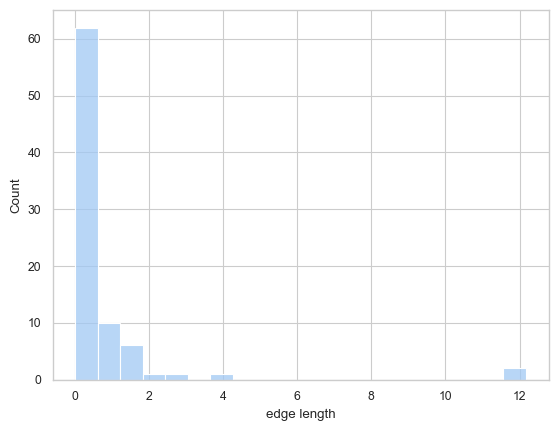

In [167]:
sns.histplot(data["edge length"], bins=20)

# Mesures d'efficience et de robustesse

In [114]:
data_er

,sp,boite,mesure,photo,global efficiency weighted,local efficiency weighted,average shortest path,robustness score
0,gigaspora,34,1,G09_10_06_P01.pklclean,0.704926,0.085291,2518.971515,0.000000
1,gigaspora,34,1,G09_10_06_P02.pklclean,0.858067,0.111427,1179.376082,0.222635
2,gigaspora,34,1,G09_10_06_P03.pklclean,0.660583,0.074682,2197.853800,0.059437
3,gigaspora,34,2,G09_16_06_P01.pklclean,0.907063,0.482632,573.751799,0.000000
4,gigaspora,34,2,G09_16_06_P02.pklclean,0.814812,0.139679,1644.715483,0.000000
...,...,...,...,...,...,...,...,...
536,rhizophagus,25,4,R25_14_07_P19.pklclean,0.690125,0.099645,4425.907413,0.000000
537,rhizophagus,25,4,R25_14_07_P20.pklclean,0.717474,0.121267,3073.885609,0.054212
538,rhizophagus,25,4,R25_14_07_P21.pklclean,0.736593,0.121367,2098.093676,0.095090
539,rhizophagus,25,4,R25_14_07_P22.pklclean,0.733778,0.124113,1598.604421,0.000000


## Efficience globale

### Par espèces

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:1.955e-06 U_stat=5.390e+02
1_gigaspora vs. 1_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:8.136e-01 U_stat=4.600e+01
3_gigaspora vs. 3_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:4.255e-02 U_stat=1.294e+03
4_gigaspora vs. 4_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:5.050e-01 U_stat=1.182e+03


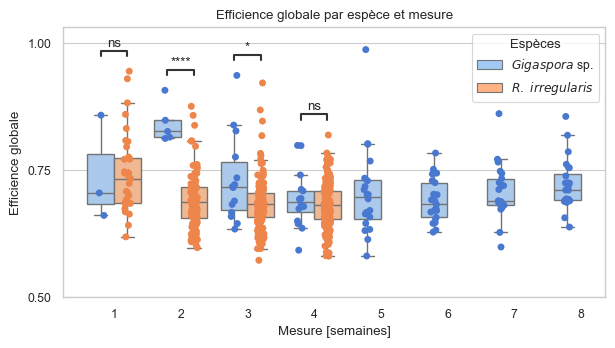

In [107]:
fig, ax = plt.subplots(figsize=(7, 3.5))

ax = sns.boxplot(x="mesure", y="global efficiency weighted", data=data_er, 
            palette=palette_pastel, hue="sp", showfliers=False)

sns.stripplot(x="mesure", y="global efficiency weighted", hue="sp", data=data_er, 
              palette=palette_muted, dodge=True, legend=False)

ax.legend(title='Espèces', handles=custom_legend, 
          loc="upper right")
          # bbox_to_anchor=(1.05, 1), loc="upper left")

ax.set_title("Efficience globale par espèce et mesure")
ax.set_ylabel("Efficience globale")
ax.set_xlabel("Mesure [semaines]")
ax.set_yticks([0.5, 0.75, 1])

unique_mesures = [1, 2, 3, 4]
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures]

annotator = Annotator(ax, pairs, data=data_er, x="mesure", y="global efficiency weighted", hue="sp")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

fig.savefig("global_eff", dpi=250, bbox_inches="tight", pad_inches=0.1)

### Evolution

In [120]:
gew_mean = data_er.groupby(
    ['boite', 'mesure']
)['global efficiency weighted'].mean().reset_index(name='global efficiency weighted')
gew_mean['sp'] = data_er.groupby(['boite', 'mesure'])['sp'].first().values # ajouter le nom des espèces

gew_mean = pd.DataFrame(gew_mean)

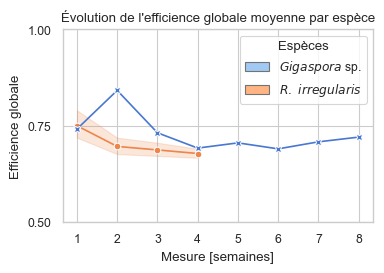

In [123]:
fig, ax = plt.subplots(figsize=(4, 2.5))

ax = sns.lineplot(x="mesure", y="global efficiency weighted", data=gew_mean, 
                  palette=palette_muted, hue="sp", markers=True, style="sp", dashes=False)

ax.legend(title='Espèces', handles=custom_legend, 
          loc="upper right")
          # bbox_to_anchor=(1.05, 1), loc="upper left")

ax.set_title("Évolution de l'efficience globale moyenne par espèce")
ax.set_ylabel("Efficience globale")
ax.set_xlabel("Mesure [semaines]")
ax.set_yticks([0.5, 0.75, 1])

fig.savefig("gew_mean", dpi=250, bbox_inches="tight", pad_inches=0.1)

### Régression linéaire

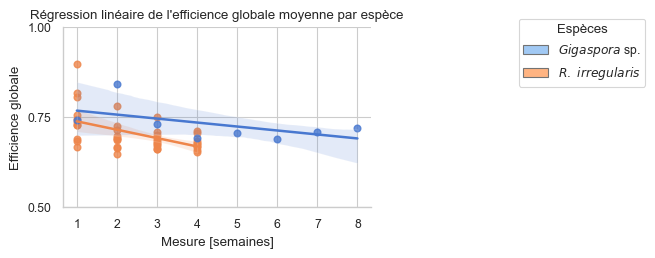

In [135]:
g = sns.lmplot(x="mesure", y="global efficiency weighted", data=gew_mean, 
                palette=palette_muted, hue="sp", height=2.5, aspect=1.6)

g._legend.remove()

fig = g.figure
ax = g.ax

fig.legend(title='Espèces', handles=custom_legend, 
          bbox_to_anchor=(1.05, 1), loc="upper left")

ax.set_title("Régression linéaire de l'efficience globale moyenne par espèce")
ax.set_ylabel("Efficience globale")
ax.set_xlabel("Mesure [semaines]")
ax.set_yticks([0.5, 0.75, 1])

fig.savefig("gew_regression", dpi=250, bbox_inches="tight", pad_inches=0.1)

## Efficience locale

### Par espèces

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:3.134e-01 U_stat=3.490e+02
1_gigaspora vs. 1_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:5.222e-01 U_stat=3.900e+01
3_gigaspora vs. 3_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:2.968e-03 U_stat=5.030e+02
4_gigaspora vs. 4_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:7.539e-01 U_stat=1.020e+03


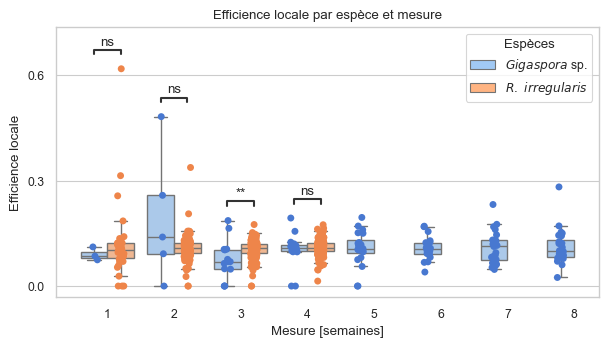

In [111]:
fig, ax = plt.subplots(figsize=(7, 3.5))

ax = sns.boxplot(x="mesure", y="local efficiency weighted", data=data_er, 
            palette=palette_pastel, hue="sp", showfliers=False)

sns.stripplot(x="mesure", y="local efficiency weighted", hue="sp", data=data_er, 
              palette=palette_muted, dodge=True, legend=False)

ax.legend(title='Espèces', handles=custom_legend, 
          loc="upper right")
          # bbox_to_anchor=(1.05, 1), loc="upper left")

ax.set_title("Efficience locale par espèce et mesure")
ax.set_ylabel("Efficience locale")
ax.set_xlabel("Mesure [semaines]")
ax.set_yticks([0, 0.3, 0.6])

unique_mesures = [1, 2, 3, 4]
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures]

annotator = Annotator(ax, pairs, data=data_er, x="mesure", y="local efficiency weighted", hue="sp")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

fig.savefig("local_eff", dpi=250, bbox_inches="tight", pad_inches=0.1)

### Evolution

In [124]:
lew_mean = data_er.groupby(
    ['boite', 'mesure']
)['local efficiency weighted'].mean().reset_index(name='local efficiency weighted')
lew_mean['sp'] = data_er.groupby(['boite', 'mesure'])['sp'].first().values # ajouter le nom des espèces

lew_mean = pd.DataFrame(lew_mean)

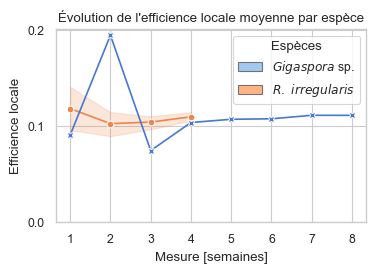

In [126]:
fig, ax = plt.subplots(figsize=(4, 2.5))

ax = sns.lineplot(x="mesure", y="local efficiency weighted", data=lew_mean, 
                  palette=palette_muted, hue="sp", markers=True, style="sp", dashes=False)

ax.legend(title='Espèces', handles=custom_legend, 
          loc="upper right")
          # bbox_to_anchor=(1.05, 1), loc="upper left")

ax.set_title("Évolution de l'efficience locale moyenne par espèce")
ax.set_ylabel("Efficience locale")
ax.set_xlabel("Mesure [semaines]")
ax.set_yticks([0, 0.1, 0.2])

fig.savefig("lew_mean", dpi=250, bbox_inches="tight", pad_inches=0.1)

### Régression linéaire

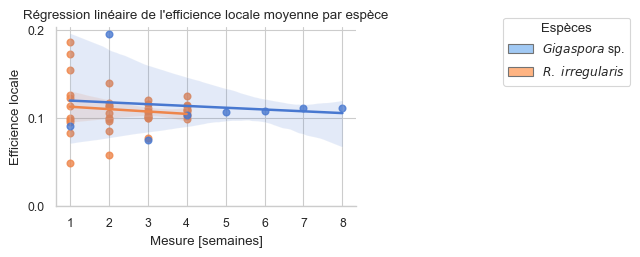

In [137]:
g = sns.lmplot(x="mesure", y="local efficiency weighted", data=lew_mean, 
                palette=palette_muted, hue="sp", height=2.5, aspect=1.6)

g._legend.remove()

fig = g.figure
ax = g.ax

fig.legend(title='Espèces', handles=custom_legend, 
          bbox_to_anchor=(1.05, 1), loc="upper left")

ax.set_title("Régression linéaire de l'efficience locale moyenne par espèce")
ax.set_ylabel("Efficience locale")
ax.set_xlabel("Mesure [semaines]")
ax.set_yticks([0, 0.1, 0.2])

fig.savefig("lew_regression", dpi=250, bbox_inches="tight", pad_inches=0.1)

## Average shortest path

### Par espèces

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:8.565e-03 U_stat=9.100e+01
1_gigaspora vs. 1_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e+00 U_stat=5.100e+01
3_gigaspora vs. 3_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:6.571e-03 U_stat=5.430e+02
4_gigaspora vs. 4_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:2.771e-01 U_stat=8.930e+02


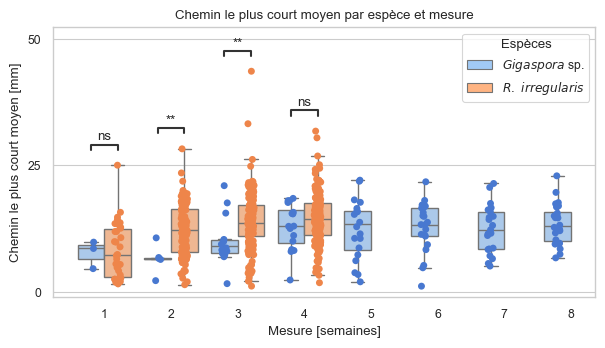

In [117]:
fig, ax = plt.subplots(figsize=(7, 3.5))

ax = sns.boxplot(x="mesure", y="average shortest path", data=data_er, 
            palette=palette_pastel, hue="sp", showfliers=False)

sns.stripplot(x="mesure", y="average shortest path", hue="sp", data=data_er, 
              palette=palette_muted, dodge=True, legend=False)

ax.legend(title='Espèces', handles=custom_legend, 
          loc="upper right")
          # bbox_to_anchor=(1.05, 1), loc="upper left")

ax.set_title("Chemin le plus court moyen par espèce et mesure")
ax.set_ylabel("Chemin le plus court moyen [mm]")
ax.set_xlabel("Mesure [semaines]")
ax.set_yticks([0, 25, 50])

unique_mesures = [1, 2, 3, 4]
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures]

annotator = Annotator(ax, pairs, data=data_er, x="mesure", y="average shortest path", hue="sp")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

fig.savefig("shortest_path", dpi=250, bbox_inches="tight", pad_inches=0.1)

### Evolution

### Régression linéaire

## Robustness score

### Par espèces

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:6.395e-01 U_stat=3.070e+02
1_gigaspora vs. 1_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:3.808e-01 U_stat=6.550e+01
3_gigaspora vs. 3_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:5.767e-01 U_stat=8.890e+02
4_gigaspora vs. 4_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:4.497e-01 U_stat=1.191e+03


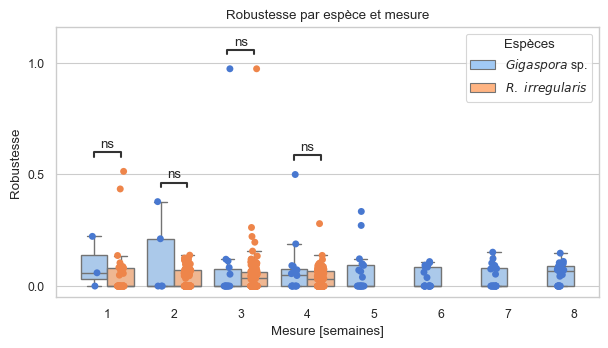

In [113]:
fig, ax = plt.subplots(figsize=(7, 3.5))

ax = sns.boxplot(x="mesure", y="robustness score", data=data_er, 
            palette=palette_pastel, hue="sp", showfliers=False)

sns.stripplot(x="mesure", y="robustness score", hue="sp", data=data_er, 
              palette=palette_muted, dodge=True, legend=False)

ax.legend(title='Espèces', handles=custom_legend, 
          loc="upper right")
          # bbox_to_anchor=(1.05, 1), loc="upper left")

ax.set_title("Robustesse par espèce et mesure")
ax.set_ylabel("Robustesse")
ax.set_xlabel("Mesure [semaines]")
ax.set_yticks([0, 0.5, 1])

unique_mesures = [1, 2, 3, 4]
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures]

annotator = Annotator(ax, pairs, data=data_er, x="mesure", y="robustness score", hue="sp")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

fig.savefig("robustness", dpi=250, bbox_inches="tight", pad_inches=0.1)

## Régressions linéaires avec pingouin

### Rhizophagus

In [141]:
mask = data_er["sp"] == "rhizophagus"

In [143]:
df_rhizo = data_er[mask]

In [144]:
df_rhizo = df_rhizo.dropna()

In [154]:
pg.linear_regression(X=df_rhizo["mesure"], y=df_rhizo["global efficiency weighted"])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.726168,0.008256,87.951100,1.902583e-270,0.050622,0.048335,0.709938,0.742397
1,mesure,-0.012751,0.002711,-4.704096,3.478153e-06,0.050622,0.048335,-0.018079,-0.007423


In [155]:
pg.linear_regression(X=df_rhizo["mesure"], y=df_rhizo["local efficiency weighted"])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.112131,0.006458,17.362275,3.743728e-51,0.001087,-0.00132,0.099436,0.124826
1,mesure,-0.001425,0.002120,-0.671934,5.019998e-01,0.001087,-0.00132,-0.005592,0.002743


### Gigaspora

In [147]:
mask = data_er["sp"] == "gigaspora"

In [148]:
df_giga = data_er[mask]
df_giga = df_giga.dropna()

In [153]:
pg.linear_regression(X=df_giga["mesure"], y=df_giga["global efficiency weighted"])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.745969,0.018646,40.006524,5.438185e-72,0.026897,0.018921,0.709057,0.782881
1,mesure,-0.005865,0.003194,-1.836330,6.874348e-02,0.026897,0.018921,-0.012188,0.000458


In [152]:
pg.linear_regression(X=df_giga["mesure"], y=df_giga["local efficiency weighted"])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.103969,0.016427,6.329231,4.257241e-09,0.000429,-0.007764,0.071451,0.136488
1,mesure,0.000644,0.002814,0.228939,8.192998e-01,0.000429,-0.007764,-0.004926,0.006214


# Betweenness centrality

In [169]:
data_bc

,sp,boite,mesure,photo,average bc nodes,average bc edges
0,gigaspora,34,1,G09_10_06_P01.pklclean,0.085529,0.084967
1,gigaspora,34,1,G09_10_06_P02.pklclean,0.182806,0.185990
2,gigaspora,34,1,G09_10_06_P03.pklclean,0.066095,0.063659
3,gigaspora,34,2,G09_16_06_P01.pklclean,0.216866,0.178379
4,gigaspora,34,2,G09_16_06_P02.pklclean,0.146531,0.143281
...,...,...,...,...,...,...
540,rhizophagus,25,4,R25_14_07_P19.pklclean,0.030610,0.026343
541,rhizophagus,25,4,R25_14_07_P20.pklclean,0.023566,0.020797
542,rhizophagus,25,4,R25_14_07_P21.pklclean,0.052161,0.046289
543,rhizophagus,25,4,R25_14_07_P22.pklclean,0.060855,0.052808


## Noeuds

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:2.437e-05 U_stat=5.460e+02
1_gigaspora vs. 1_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:5.786e-01 U_stat=6.200e+01
3_gigaspora vs. 3_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:3.912e-02 U_stat=1.300e+03
4_gigaspora vs. 4_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:2.689e-02 U_stat=1.436e+03


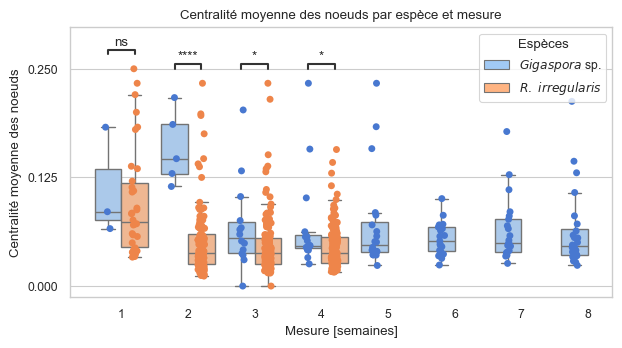

In [170]:
fig, ax = plt.subplots(figsize=(7, 3.5))

ax = sns.boxplot(x="mesure", y="average bc nodes", data=data_bc, 
            palette=palette_pastel, hue="sp", showfliers=False)

sns.stripplot(x="mesure", y="average bc nodes", hue="sp", data=data_bc, 
              palette=palette_muted, dodge=True, legend=False)

ax.legend(title='Espèces', handles=custom_legend, 
          loc="upper right")
          # bbox_to_anchor=(1.05, 1), loc="upper left")

ax.set_title("Centralité moyenne des noeuds par espèce et mesure")
ax.set_ylabel("Centralité moyenne des noeuds")
ax.set_xlabel("Mesure [semaines]")
ax.set_yticks([0, 0.125, 0.25])

unique_mesures = [1, 2, 3, 4]
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures]

annotator = Annotator(ax, pairs, data=data_bc, x="mesure", y="average bc nodes", hue="sp")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

fig.savefig("bc_nodes", dpi=250, bbox_inches="tight", pad_inches=0.1)

## Liens

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:2.072e-05 U_stat=5.470e+02
1_gigaspora vs. 1_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:4.389e-01 U_stat=6.600e+01
3_gigaspora vs. 3_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:2.819e-03 U_stat=1.446e+03
4_gigaspora vs. 4_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:2.732e-02 U_stat=1.435e+03


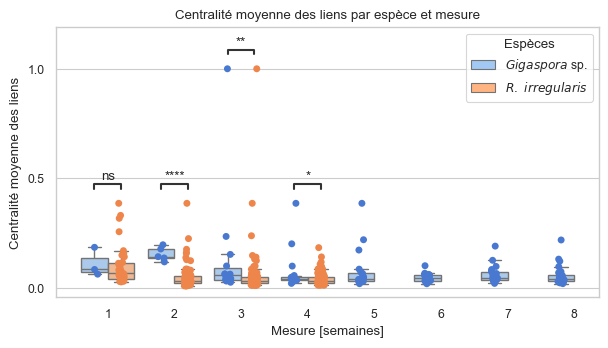

In [172]:
fig, ax = plt.subplots(figsize=(7, 3.5))

ax = sns.boxplot(x="mesure", y="average bc edges", data=data_bc, 
            palette=palette_pastel, hue="sp", showfliers=False)

sns.stripplot(x="mesure", y="average bc edges", hue="sp", data=data_bc, 
              palette=palette_muted, dodge=True, legend=False)

ax.legend(title='Espèces', handles=custom_legend, 
          loc="upper right")
          # bbox_to_anchor=(1.05, 1), loc="upper left")

ax.set_title("Centralité moyenne des liens par espèce et mesure")
ax.set_ylabel("Centralité moyenne des liens")
ax.set_xlabel("Mesure [semaines]")
ax.set_yticks([0, 0.5, 1])

unique_mesures = [1, 2, 3, 4]
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures]

annotator = Annotator(ax, pairs, data=data_bc, x="mesure", y="average bc edges", hue="sp")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

fig.savefig("bc_nodes", dpi=250, bbox_inches="tight", pad_inches=0.1)

# Angles

In [174]:
angles

,sp,boite,mesure,photo,angle
0,gigaspora,34,1,G09_10_06_P01.pklclean,-1.9270
1,gigaspora,34,1,G09_10_06_P01.pklclean,-1.9271
2,gigaspora,34,1,G09_10_06_P01.pklclean,-2.5796
3,gigaspora,34,1,G09_10_06_P01.pklclean,-2.2468
4,gigaspora,34,1,G09_10_06_P01.pklclean,-2.6449
...,...,...,...,...,...
1617767,rhizophagus,25,4,R25_14_07_P23.pklclean,-0.4673
1617768,rhizophagus,25,4,R25_14_07_P23.pklclean,-1.1012
1617769,rhizophagus,25,4,R25_14_07_P23.pklclean,-0.9868
1617770,rhizophagus,25,4,R25_14_07_P23.pklclean,-2.6533


In [175]:
def circular_hist(ax, x, bins=16, density=True, offset=0, gaps=True, fill=True):
    """
    Produce a circular histogram of angles on ax.

    Parameters
    ----------
    ax : matplotlib.axes._subplots.PolarAxesSubplot
        axis instance created with subplot_kw=dict(projection='polar').

    x : array
        Angles to plot, expected in units of radians.

    bins : int, optional
        Defines the number of equal-width bins in the range. The default is 16.

    density : bool, optional
        If True plot frequency proportional to area. If False plot frequency
        proportional to radius. The default is True.

    offset : float, optional
        Sets the offset for the location of the 0 direction in units of
        radians. The default is 0.

    gaps : bool, optional
        Whether to allow gaps between bins. When gaps = False the bins are
        forced to partition the entire [-pi, pi] range. The default is True.

    Returns
    -------
    n : array or list of arrays
        The number of values in each bin.

    bins : array
        The edges of the bins.

    patches : .BarContainer or list of a single .Polygon
        Container of individual artists used to create the histogram
        or list of such containers if there are multiple input datasets.
    """
    # Wrap angles to [-pi, pi)
    x = (x+np.pi) % (2*np.pi) - np.pi

    # Force bins to partition entire circle
    if not gaps:
        bins = np.linspace(-np.pi, np.pi, num=bins+1)

    # Bin data and record counts
    n, bins = np.histogram(x, bins=bins)

    # Compute width of each bin
    widths = np.diff(bins)

    # By default plot frequency proportional to area
    if density:
        # Area to assign each bin
        area = n / x.size
        # Calculate corresponding bin radius
        radius = (area/np.pi) ** .5
    # Otherwise plot frequency proportional to radius
    else:
        radius = n

    # Plot data on ax
    patches = ax.bar(bins[:-1], radius, zorder=1, align='edge', width=widths,
                     edgecolor='C0', fill=fill, linewidth=1)

    # Set the direction of the zero angle
    ax.set_theta_offset(offset)

    # Remove ylabels for area plots (they are mostly obstructive)
    if density:
        ax.set_yticks([])

    return n, bins, patches

In [186]:
data = angles[angles["photo"] == "G09_29_07_P15.pklclean"]
data = data["angle"].to_numpy()
data

array([-2.6100e-02, -7.9620e-01, -3.0843e+00, -4.8500e-02, -2.8491e+00,
       -9.6300e-02, -1.2511e+00, -1.3016e+00, -7.8500e-02, -1.1860e-01,
       -2.2121e+00,  1.7000e-03, -3.8760e-01, -1.9211e+00, -1.1380e-01,
       -1.5670e-01, -2.7400e-02, -7.4220e-01, -2.0210e+00, -1.5910e-01,
       -6.2400e-02, -2.9403e+00, -1.4916e+00, -2.6670e-01, -1.5168e+00,
       -9.8200e-02, -2.9822e+00, -2.2044e+00, -2.0610e-01, -7.4850e-01,
       -1.5708e+00, -2.8624e+00, -1.6660e-01, -7.5650e-01,  2.3100e-02,
       -2.2146e+00, -1.2830e-01, -2.0291e+00, -3.2940e-01, -3.0870e-01,
       -1.7335e+00, -9.2500e-02, -2.6292e+00, -5.8270e-01, -3.0509e+00,
       -2.5302e+00, -2.7300e-01, -1.8370e-01, -1.6194e+00, -1.0133e+00,
       -3.0953e+00, -2.1400e-01, -2.5910e-01, -1.8647e+00, -3.0120e-01,
       -1.6227e+00, -1.3290e-01, -1.3020e-01, -1.6028e+00, -2.1703e+00,
       -5.8550e-01, -4.5400e-02, -3.5990e-01, -1.5810e-01, -3.1028e+00,
       -2.5196e+00, -7.1930e-01, -6.3650e-01, -2.3502e+00, -1.24

In [184]:
fill_colors = sns.color_palette("pastel", n_colors=1)
edge_colors = sns.color_palette("muted", n_colors=1)

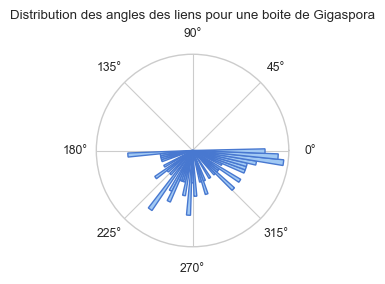

In [187]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(4, 2.5))

n, bins, patches = circular_hist(ax, data, bins=50, density=True, offset=0, gaps=True)

for i, bar in enumerate(patches):
    bar.set_facecolor(fill_colors[i % len(fill_colors)])
    if hasattr(bar, "set_edgecolor"):
        bar.set_edgecolor(edge_colors[i % len(edge_colors)])
    else:
        bar.set(ec=edge_colors[i % len(edge_colors)])

ax.set_title("Distribution des angles des liens pour une boite de Gigaspora")

fig.savefig("angles", dpi=250, bbox_inches="tight", pad_inches=0.1)